In [4]:
from yahoo_fin import options
import datetime
from datetime import datetime,date
from wallstreet import Call

import numpy as np
import sympy as sy
from scipy import log, exp, sqrt, stats
#import sy.statistics as systats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
SPX_Call = pd.read_csv('SPX_Options_Call.csv')
SPX_Call = SPX_Call.drop('Unnamed: 0', axis=1)
SPX_Call.head()

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity
0,SPXW191213C01950000,2019-12-04 10:47AM EST,1950,1164.00,1183.6,1189.8,0.0,-,1,9,161.62%,2019-12-13,2019-12-10,3
1,SPXW191213C02000000,2019-11-27 1:20PM EST,2000,1149.91,1133.6,1139.8,0.0,-,-,10,153.61%,2019-12-13,2019-12-10,3
2,SPXW191213C02200000,2019-12-06 3:12PM EST,2200,946.48,933.7,939.8,0.0,-,1,1,125.20%,2019-12-13,2019-12-10,3
3,SPXW191213C02480000,2019-11-18 12:03AM EST,2480,612.58,653.8,659.9,0.0,-,-,10,88.33%,2019-12-13,2019-12-10,3
4,SPXW191213C02500000,2019-10-30 10:22AM EST,2500,530.52,639.9,644.8,0.0,-,1,1,124.18%,2019-12-13,2019-12-10,3


In [17]:
SPX_Call['Call Price'] = (SPX_Call['Bid'] + SPX_Call['Ask']/2.0)
SPX_Call['Current Price'] = 3135.96
SPX_Call.head()

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity,Call Price,Current Price
0,SPXW191213C01950000,2019-12-04 10:47AM EST,1950,1164.00,1183.6,1189.8,0.0,-,1,9,161.62%,2019-12-13,2019-12-10,3,1778.50,3135.96
1,SPXW191213C02000000,2019-11-27 1:20PM EST,2000,1149.91,1133.6,1139.8,0.0,-,-,10,153.61%,2019-12-13,2019-12-10,3,1703.50,3135.96
2,SPXW191213C02200000,2019-12-06 3:12PM EST,2200,946.48,933.7,939.8,0.0,-,1,1,125.20%,2019-12-13,2019-12-10,3,1403.60,3135.96
3,SPXW191213C02480000,2019-11-18 12:03AM EST,2480,612.58,653.8,659.9,0.0,-,-,10,88.33%,2019-12-13,2019-12-10,3,983.75,3135.96
4,SPXW191213C02500000,2019-10-30 10:22AM EST,2500,530.52,639.9,644.8,0.0,-,1,1,124.18%,2019-12-13,2019-12-10,3,962.30,3135.96


The PDF and CDF of a standard normal distribution is given as:

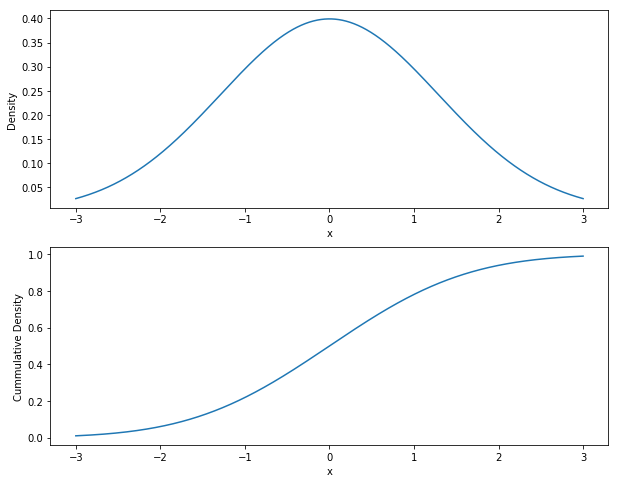

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
a = 0
x = np.linspace(stats.skewnorm.ppf(0.01, a),stats.skewnorm.ppf(0.99, a), 1000)

x_axis = np.linspace(-3,3,1000)
plt.rcParams['figure.figsize'] = [10,8]

plt.subplot(211)
plt.plot(x_axis,stats.skewnorm.pdf(x, a))
plt.xlabel('x');
plt.ylabel('Density');

plt.subplot(212)
plt.plot(x_axis, stats.skewnorm.cdf(x, a))
plt.xlabel('x');
plt.ylabel('Cummulative Density');
plt.show();

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sop
from scipy.integrate import quad

import warnings
warnings.filterwarnings('ignore')
r = 0.025

S0 = SPX_Call['Current Price'].iloc[0]

print(SPX_Call)

            Contract Name         Last Trade Date  Strike  Last Price     Bid  \
0     SPXW191213C01950000  2019-12-04 10:47AM EST    1950     1164.00  1183.6   
1     SPXW191213C02000000   2019-11-27 1:20PM EST    2000     1149.91  1133.6   
2     SPXW191213C02200000   2019-12-06 3:12PM EST    2200      946.48   933.7   
3     SPXW191213C02480000  2019-11-18 12:03AM EST    2480      612.58   653.8   
4     SPXW191213C02500000  2019-10-30 10:22AM EST    2500      530.52   639.9   
...                   ...                     ...     ...         ...     ...   
2763   SPX211217C04100000   2019-12-04 2:29PM EST    4100       15.35    15.9   
2764   SPX211217C04200000  2019-12-09 11:56AM EST    4200       12.47    11.8   
2765   SPX211217C04300000   2019-11-27 2:52PM EST    4300        9.30     8.8   
2766   SPX211217C04400000  2019-12-03 11:55AM EST    4400        6.33     6.8   
2767   SPX211217C04500000  2019-12-04 12:21PM EST    4500        5.40     5.3   

         Ask  Change % Chan

In [15]:
def find_cdf(x, Q, B, nu):
    v=1/((1+Q*(np.exp(-B*(x-1))))**(1/nu))
    return 1-v

def find_call_value(S0, K, r, T, p0):
    Q, B, nu = p0
    func = lambda x: find_cdf(x, Q, B, nu)
    p = quad(func, K/S0, np.inf)
    return S0*np.exp(-r*T)*p[0]


In [20]:
def error_func(p0):
    global i, min_RMSE
    se = []
    for row, option in SPX_Call.iterrows():
        T = (option['Time to Maturity']) / 365.
        model_value = find_call_value(S0, option['Strike'], r, T, p0)
        se.append((model_value - option['Call Price']) ** 2)
    RMSE = np.sqrt(sum(se) / len(se))
    min_RMSE = min(min_RMSE, RMSE)
    if i % 50 == 0:
        print('%4d |' % i, np.array(p0), '| %7.3f | %7.3f' % (RMSE, min_RMSE))
    i += 1
    return RMSE


In [21]:
def generate_plot(opt, options):
    options['Model'] = 0.0
    for row, option in options.iterrows():
        T = (option['Time to Maturity']) / 365.
        options.at[row, 'Model'] = find_call_value(S0, option['Strike'], r, T, opt)

    options = options.set_index('Strike')
    fig, ax = plt.subplots(2, sharex=True, figsize=(10, 8))
    options[['Call Price', 'Model']].plot(style=['b-', 'ro'],
                    title='%s' % str(option['Time to Maturity'])[:10], ax=ax[0])
    ax[0].set_ylabel('option values')
    ax[0].grid(True)
    xv = options.index.values
    se = ((options['Model'] - options['Call Price'])**2)
    RMSE = np.sqrt(sum(se) / len(se))
    print(RMSE)
    ax[1] = plt.bar(xv - 5 / 2., options['Model'] - options['Call Price'],
                    width=5)
    plt.ylabel('difference')
    plt.xlim(min(xv) - 10, max(xv) + 10)
    plt.tight_layout()
    plt.grid(True)

   0 | [  6. 100.   2.] | 272.883 | 100.000
  50 | [  7.  102.    2.5] | 279.970 | 100.000
 100 | [  8.  104.5   2.5] | 277.867 | 100.000
 150 | [  9.5 102.    2.5] | 274.913 | 100.000
[  9.5 100.    2. ]
 200 | [17.33284955 85.79383202  0.10261814] | 200.096 | 100.000
 250 | [1.75096318e+01 8.49902879e+01 6.12071383e-02] | 199.053 | 100.000
 300 | [1.74934166e+01 8.51808105e+01 6.04232330e-02] | 199.053 | 100.000
[1.74837576e+01 8.51497092e+01 6.05385272e-02]
199.053147815893


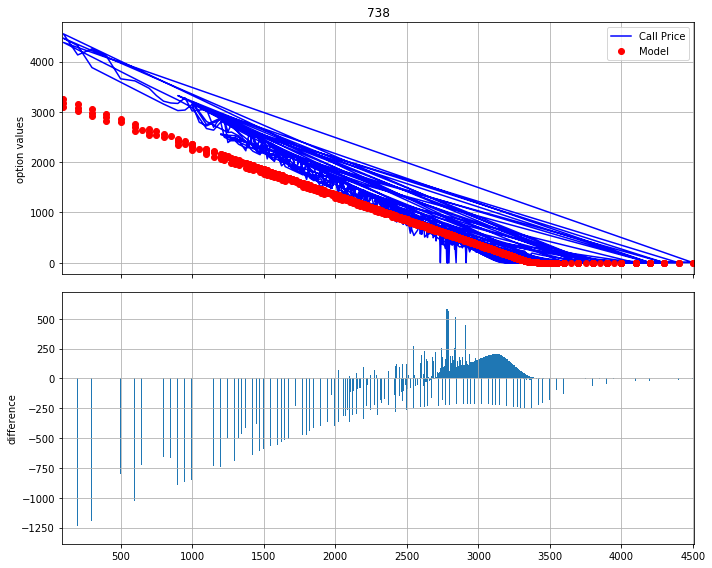

In [22]:
i = 0
min_RMSE = 100.

p0 = sop.brute(error_func, ((6, 10, 0.5), (100, 105, 0.5), (2, 3, 0.5)), finish=None)
print(p0)
opt = sop.fmin(error_func, p0, xtol=0.00001,
                ftol=0.00001, maxiter=100, maxfun=200)
print(opt)
generate_plot(opt, SPX_Call)

Extracted Density

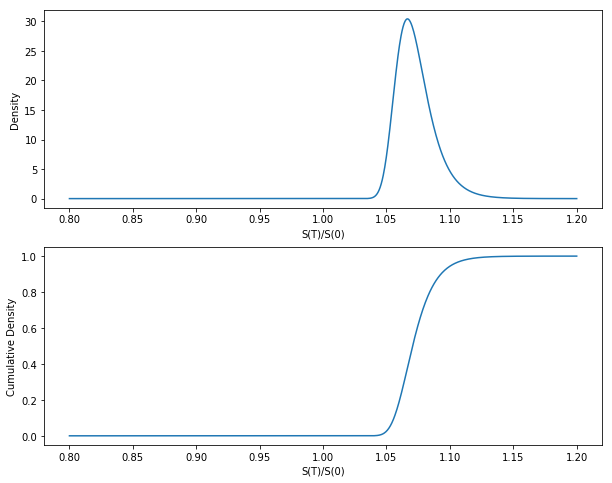

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(0.8, 1.2, 1000)
Q, B, nu = opt
cdf = 1/((1+Q*(np.exp(-B*(x-1))))**(1/nu))
pdf = (-1/nu)*((1+Q*np.exp(-B*(x-1)))**((-1/nu)-1))*(-Q*B)*np.exp(-B*(x-1))
plt.rcParams['figure.figsize'] = [10,8]

plt.subplot(211)
plt.plot(x,pdf);
plt.xlabel('S(T)/S(0)');
plt.ylabel('Density');

plt.subplot(212)
plt.plot(x,cdf);
plt.xlabel('S(T)/S(0)');
plt.ylabel('Cumulative Density');

In [25]:
import time

S0 = 2905.58
K = 2860
T = 15/365

times = np.zeros(1000)
for i in range(1000):
    t = time.time()
    find_call_value(S0, K, r, T, opt)
    times[i] = time.time() - t
print('Average Calculation Time:', np.mean(times))

est_call = find_call_value(S0, K, r, T, opt)
print('Estimated Call Value:', est_call)

actual_call = SPX_Call['Call Price'].loc[SPX_Call['Strike']==K].iloc[0]
print('Actual Call Value:', actual_call)

print('RMSE:', np.sqrt((est_call-actual_call)**2))

Average Calculation Time: 0.0005525410175323487
Estimated Call Value: 257.30205493745945
Actual Call Value: 415.15
RMSE: 157.84794506254053


Monte-Carlo Simulations

In [26]:
import numpy as np

def cdf_inv(u):
    return 1 - (1/opt[1])*np.log((1/opt[0]) * (1/(u**opt[2]) - 1))

np.random.seed = 1000
u = np.random.uniform(size=100000)
x = cdf_inv(u)

ST = S0*x

payoff = (ST-K)
payoff[payoff<0] = 0.0

est_call = np.exp(-r*T)*np.mean(payoff)
print('Estimated Call Value:', est_call)

actual_call = SPX_Call['Call Price'].loc[SPX_Call['Strike']==K].iloc[0]
print('Actual Call Value:', actual_call)

print('RMSE:', np.sqrt((est_call-actual_call)**2))

Estimated Call Value: 257.5717211300825
Actual Call Value: 415.15
RMSE: 157.57827886991748


(array([1.0000e+00, 5.0000e+00, 3.8000e+01, 2.0600e+02, 7.3100e+02,
        2.0610e+03, 4.2060e+03, 6.8600e+03, 9.2580e+03, 1.0957e+04,
        1.1066e+04, 1.0268e+04, 9.1300e+03, 7.9740e+03, 6.3800e+03,
        5.2040e+03, 3.8740e+03, 3.0740e+03, 2.2670e+03, 1.7070e+03,
        1.2280e+03, 9.6000e+02, 6.4500e+02, 4.9000e+02, 3.9200e+02,
        2.7400e+02, 2.0100e+02, 1.3600e+02, 1.0400e+02, 8.8000e+01,
        5.2000e+01, 4.4000e+01, 3.8000e+01, 2.6000e+01, 1.4000e+01,
        1.0000e+01, 1.2000e+01, 6.0000e+00, 2.0000e+00, 3.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.02867765, 1.03234702, 1.03601639, 1.03968576, 1.04335513,
        1.0470245 , 1.05069387, 1.05436324, 1.05803261, 1.06170198,
        1.06537135, 1.06904072, 1.07271008, 1.07637945, 1.08004882,
        1.08371819, 1.08738756, 1.09105693, 1.0947263 , 1.09839567,
        1.10206504, 1.10573441, 1.10940378, 1.

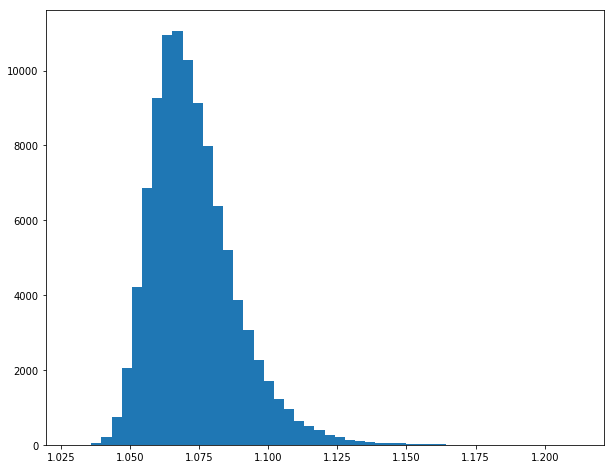

In [27]:
plt.hist(x, bins=50)